In [28]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving game.csv to game.csv


{'game.csv': b"App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\r\n8 Ball Pool,Game,4.5,20000000.00,~120MB,1000000000,Free,0,Everyone,Sports; Pool,Oct-24,5.13.1,4.4+\r\nAmong Us,Game,4.3,12000000.00,~100MB,500000000,Free,0,Everyone 10+,Social Deduction,Oct-24,2023.9.13,5.0+\r\nAmong Us,Game,4.3,20000000.00,~250MB,500000000,Free,0,Everyone 10+,Action; Multiplayer,Oct-24,2024.10.23,5.0+\r\nAngry Birds 2,Game,4.4,8000000.00,~200MB,500000000,Free,0,Everyone,Puzzle; Slingshot,Sep-24,2.60.1,5.0+\r\nAngry Birds 2,Game,4.5,30000000.00,~100MB,500000000,Free,0,Everyone,Arcade; Physics-based,Sep-24,2.57.1,4.4+\r\nAsphalt 9: Legends,Game,4.5,9000000.00,~2GB,100000000,Free,0,Teen,Racing,Oct-24,4.0.3a,6.0+\r\nAsphalt 9: Legends,Game,4.6,13000000.00,~2GB,100000000,Free,0,Everyone,Racing,Oct-24,3.9.0,6.0+\r\nBADLAND,Game,4.6,500000.00,~100MB,10000000,Paid,1,Everyone,Action; Adventure,Oct-24,3.0.0,4.4+\r\nBaldur's Gate: Enhanced Editi

In [3]:
data=pd.read_csv('game.csv')
data

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,8 Ball Pool,Game,4.5,20000000.0,~120MB,1000000000,Free,0,Everyone,Sports; Pool,Oct-24,5.13.1,4.4+
1,Among Us,Game,4.3,12000000.0,~100MB,500000000,Free,0,Everyone 10+,Social Deduction,Oct-24,2023.9.13,5.0+
2,Among Us,Game,4.3,20000000.0,~250MB,500000000,Free,0,Everyone 10+,Action; Multiplayer,Oct-24,2024.10.23,5.0+
3,Angry Birds 2,Game,4.4,8000000.0,~200MB,500000000,Free,0,Everyone,Puzzle; Slingshot,Sep-24,2.60.1,5.0+
4,Angry Birds 2,Game,4.5,30000000.0,~100MB,500000000,Free,0,Everyone,Arcade; Physics-based,Sep-24,2.57.1,4.4+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Words with Friends,Game,4.6,10000000.0,~200MB,100000000,Free,0,Everyone,Word; Multiplayer,Sep-24,14.0.16,5.0+
116,Wordscapes,Game,4.7,8000000.0,~120MB,50000000,Free,0,Everyone,Word,Sep-24,2.2.0,5.0+
117,World of Tanks Blitz,Game,4.5,5000000.0,~2GB,100000000,Free,0,Teen,Action; Shooter,Sep-24,10.0.5.544,5.0+
118,WWE SuperCard,Game,4.4,10000000.0,~100MB,100000000,Free,0,Teen,Card,Sep-24,5.3.2,5.0+


In [4]:
# copy
df=data.copy()
df

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,8 Ball Pool,Game,4.5,20000000.0,~120MB,1000000000,Free,0,Everyone,Sports; Pool,Oct-24,5.13.1,4.4+
1,Among Us,Game,4.3,12000000.0,~100MB,500000000,Free,0,Everyone 10+,Social Deduction,Oct-24,2023.9.13,5.0+
2,Among Us,Game,4.3,20000000.0,~250MB,500000000,Free,0,Everyone 10+,Action; Multiplayer,Oct-24,2024.10.23,5.0+
3,Angry Birds 2,Game,4.4,8000000.0,~200MB,500000000,Free,0,Everyone,Puzzle; Slingshot,Sep-24,2.60.1,5.0+
4,Angry Birds 2,Game,4.5,30000000.0,~100MB,500000000,Free,0,Everyone,Arcade; Physics-based,Sep-24,2.57.1,4.4+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Words with Friends,Game,4.6,10000000.0,~200MB,100000000,Free,0,Everyone,Word; Multiplayer,Sep-24,14.0.16,5.0+
116,Wordscapes,Game,4.7,8000000.0,~120MB,50000000,Free,0,Everyone,Word,Sep-24,2.2.0,5.0+
117,World of Tanks Blitz,Game,4.5,5000000.0,~2GB,100000000,Free,0,Teen,Action; Shooter,Sep-24,10.0.5.544,5.0+
118,WWE SuperCard,Game,4.4,10000000.0,~100MB,100000000,Free,0,Teen,Card,Sep-24,5.3.2,5.0+


In [ ]:
# decribe
df.describe()

,Rating,Reviews(+),Installs(+),Price
count,120.000000,1.200000e+02,1.200000e+02,120.000000
mean,4.496667,1.242958e+07,2.744417e+08,0.208333
std,0.139587,1.262142e+07,3.478988e+08,0.407819
min,4.100000,5.000000e+04,5.000000e+05,0.000000
25%,4.400000,5.000000e+06,5.000000e+07,0.000000
50%,4.500000,1.000000e+07,1.000000e+08,0.000000
75%,4.600000,1.500000e+07,5.000000e+08,0.000000
max,4.900000,5.800000e+07,2.000000e+09,1.000000


In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             120 non-null    object 
 1   Category        120 non-null    object 
 2   Rating          120 non-null    float64
 3   Reviews(+)      120 non-null    float64
 4   Size            120 non-null    object 
 5   Installs(+)     120 non-null    int64  
 6   Type            120 non-null    object 
 7   Price           120 non-null    int64  
 8   Content Rating  120 non-null    object 
 9   Genres          120 non-null    object 
 10  Last Updated    120 non-null    object 
 11  Current Ver     120 non-null    object 
 12  Android Ver     120 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 12.3+ KB


In [ ]:
#isnull
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews(+),0
Size,0
Installs(+),0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
# paid games counts
paid_games=df[df['Type']=='Paid']
paid_games

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7,BADLAND,Game,4.6,500000.0,~100MB,10000000,Paid,1,Everyone,Action; Adventure,Oct-24,3.0.0,4.4+
8,Baldur's Gate: Enhanced Edition,Game,4.7,100000.0,~2GB,1000000,Paid,1,Teen,RPG,Sep-24,2.5.0,4.4+
30,Dead Space Mobile,Game,4.3,100000.0,~2GB,500000,Paid,1,Mature 17+,Action; Shooter,Sep-24,1.0.0,4.4+
42,Football Manager Mobile,Game,4.4,10000000.0,~100MB,1000000,Paid,1,Everyone 10+,Sports; Simulation,Oct-24,15.4.0,4.4+
50,Grand Theft Auto: San Andreas,Game,4.5,1000000.0,~2GB,10000000,Paid,1,Mature 17+,Action; Adventure,Sep-24,2.0.0,5.0+
54,Hitman: Sniper,Game,4.5,5000000.0,~250MB,10000000,Paid,1,Teen,Action; Shooter,Sep-24,1.7.2,4.1+
56,Hot Springs Story,Game,4.7,500000.0,~100MB,5000000,Paid,1,Everyone,Simulation,Oct-24,1.5.7,4.0+
59,Infinity Blade,Game,4.6,1000000.0,~500MB,10000000,Paid,1,Teen,Action; RPG,Oct-24,1.3.4,4.3+
60,Kairosoft's Game Developer Story,Game,4.8,500000.0,~50MB,1000000,Paid,1,Everyone,Simulation,Nov-24,1.2.0,4.0+
62,Lara Croft: Relic Run,Game,4.4,5000000.0,~100MB,10000000,Paid,1,Teen,Action; Adventure,Oct-24,1.1,4.4+


In [ ]:
#free games counts
free_games=df[df['Type']=='Free']
free_games

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,8 Ball Pool,Game,4.5,20000000.0,~120MB,1000000000,Free,0,Everyone,Sports; Pool,Oct-24,5.13.1,4.4+
1,Among Us,Game,4.3,12000000.0,~100MB,500000000,Free,0,Everyone 10+,Social Deduction,Oct-24,2023.9.13,5.0+
2,Among Us,Game,4.3,20000000.0,~250MB,500000000,Free,0,Everyone 10+,Action; Multiplayer,Oct-24,2024.10.23,5.0+
3,Angry Birds 2,Game,4.4,8000000.0,~200MB,500000000,Free,0,Everyone,Puzzle; Slingshot,Sep-24,2.60.1,5.0+
4,Angry Birds 2,Game,4.5,30000000.0,~100MB,500000000,Free,0,Everyone,Arcade; Physics-based,Sep-24,2.57.1,4.4+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Words with Friends,Game,4.6,10000000.0,~200MB,100000000,Free,0,Everyone,Word; Multiplayer,Sep-24,14.0.16,5.0+
116,Wordscapes,Game,4.7,8000000.0,~120MB,50000000,Free,0,Everyone,Word,Sep-24,2.2.0,5.0+
117,World of Tanks Blitz,Game,4.5,5000000.0,~2GB,100000000,Free,0,Teen,Action; Shooter,Sep-24,10.0.5.544,5.0+
118,WWE SuperCard,Game,4.4,10000000.0,~100MB,100000000,Free,0,Teen,Card,Sep-24,5.3.2,5.0+


In [ ]:
# count Type
df['Type'].value_counts()

,count
Type,
Free,96
Paid,24


In [ ]:
# Highest rating games
highest_rating_games=df.sort_values(by='Rating',ascending=False).head(1)
highest_rating_games

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
107,The Room: Old Sins,Game,4.9,1000000.0,~500MB,5000000,Paid,1,Everyone,Puzzle,Nov-24,1.0.9,4.1+


In [ ]:
# Lowest Rating games
lowest_rating_games=df.sort_values(by='Rating',ascending=True).head(1)
lowest_rating_games

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
103,Super Mario Run,Game,4.1,4000000.0,~300MB,100000000,Free,1,Everyone,Action; Platformer,Oct-24,3.0.27,6.0+


In [52]:
# Genres
df['Genres'].value_counts().head(20)

,count
Genres,
Action; Shooter,8
Strategy,7
Simulation,6
Arcade,6
Racing,5
Puzzle,5
RPG,4
Action; Adventure,3
Board,3


In [ ]:
# Largest Installs Game
top_1_installs = df.nlargest(1, 'Installs(+)')
(top_1_installs)

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
102,Subway Surfers,Game,4.6,37000000.0,~180MB,2000000000,Free,0,Everyone,Action; Endless Run,Oct-24,3.19.1,4.4+


In [ ]:
# Smallest Installs Game
top_1_installs = df.nsmallest(1, 'Installs(+)')
(top_1_installs)

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
30,Dead Space Mobile,Game,4.3,100000.0,~2GB,500000,Paid,1,Mature 17+,Action; Shooter,Sep-24,1.0.0,4.4+


In [ ]:
# Largest Reviews Game
top_1_reviews = df.nlargest(1, 'Reviews(+)')
(top_1_reviews)

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
21,Clash of Clans,Game,4.5,58000000.0,~170MB,500000000,Free,0,Everyone 10+,Strategy,Oct-24,15.83.1,5.0+


In [ ]:
# Smallest Reviews Game
top_1_reviews = df.nsmallest(1, 'Reviews(+)')
(top_1_reviews)
#

,App,Category,Rating,Reviews(+),Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
65,Limbo,Game,4.7,50000.0,~80MB,1000000,Paid,1,Teen,Puzzle; Adventure,Sep-24,1.17,4.1+


In [ ]:
# price
price_counts=df['Price'].value_counts()
price_counts

,count
Price,
0,95
1,25


In [5]:
# EDA- Explotary Data Analysis

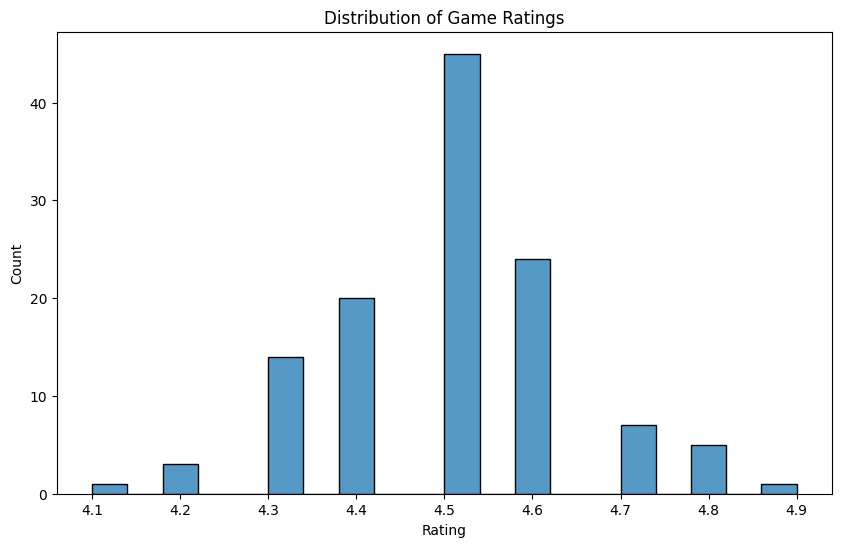

In [19]:
# histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20)
plt.title('Distribution of Game Ratings')
plt.show()


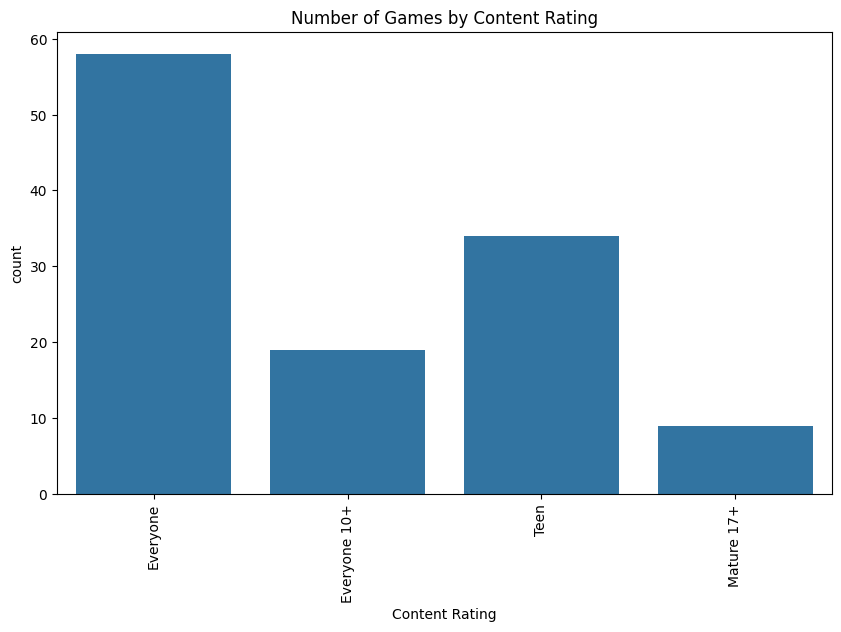

In [39]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df)
plt.title('Number of Games by Content Rating')
plt.xticks(rotation=90)
plt.show()


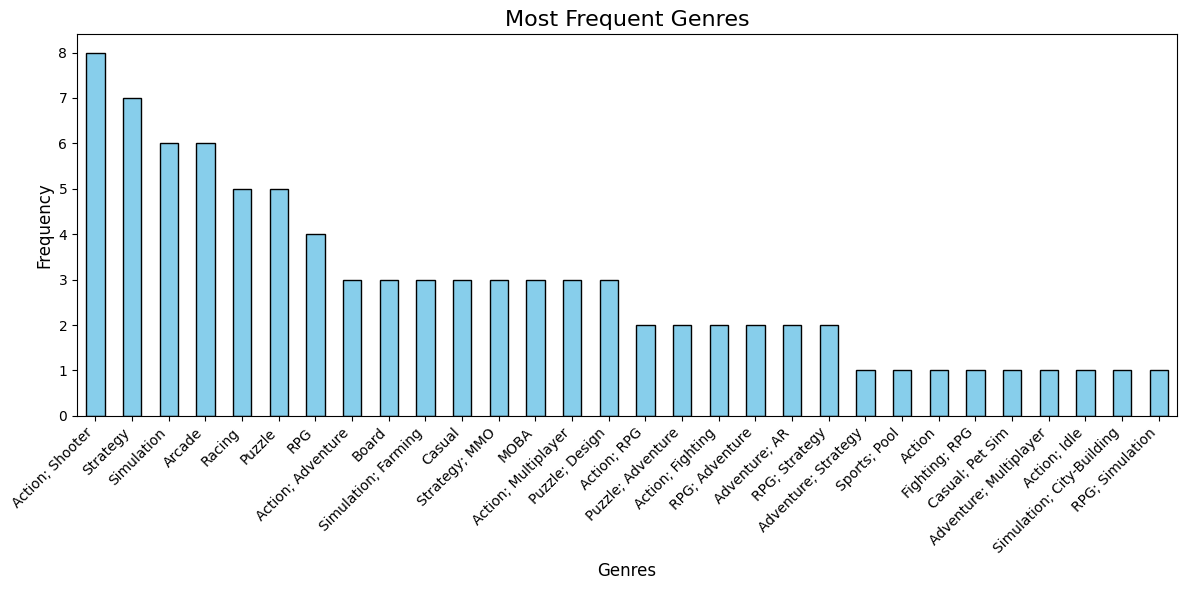

In [60]:
# Bar chart
genres = df['Genres'].value_counts().head(30)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
genres.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Most Frequent Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

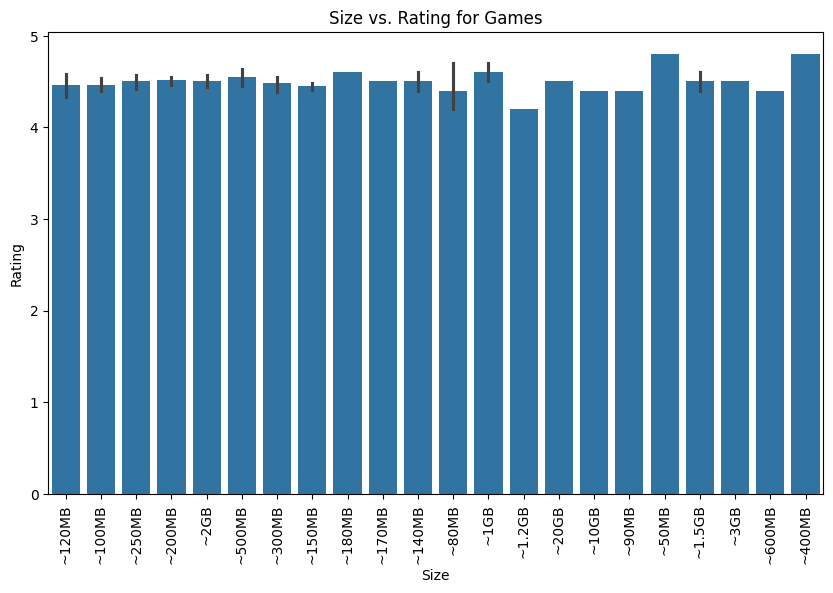

In [46]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Size',y='Rating', data=df)
plt.title('Size vs. Rating for Games')
plt.xticks(rotation=90)
plt.show()

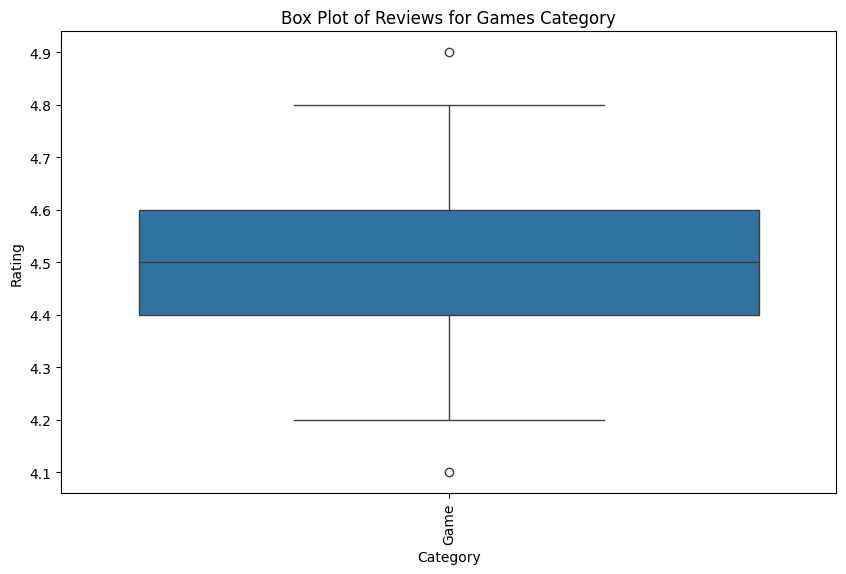

In [21]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Box Plot of Reviews for Games Category')
plt.xticks(rotation=90)
plt.show()


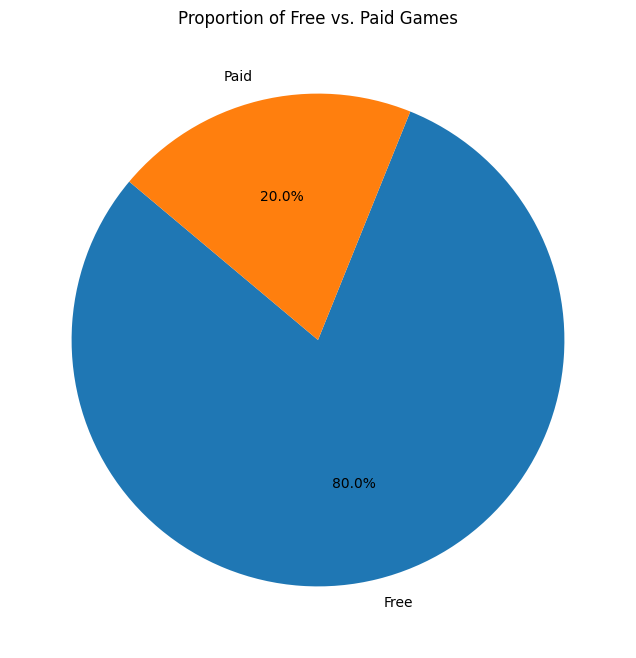

In [23]:
# pie chart
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Free vs. Paid Games')
plt.show()


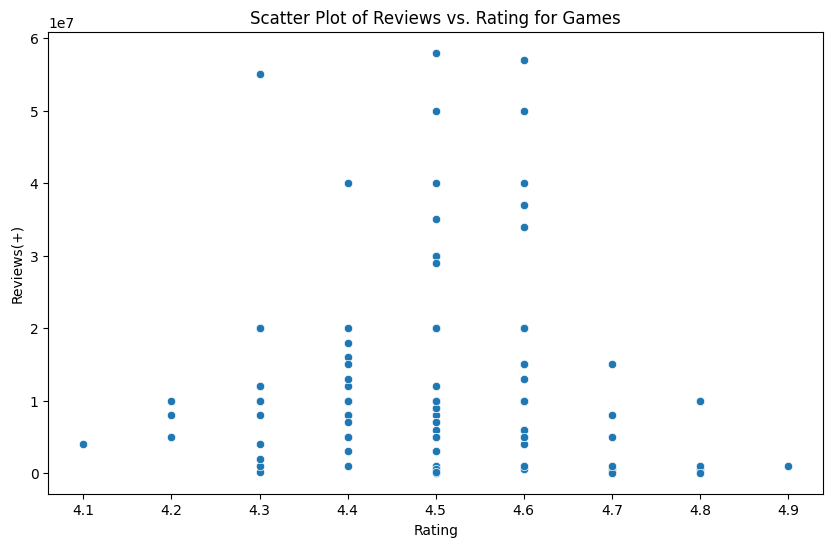

In [31]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews(+)', data=df)
plt.title('Scatter Plot of Reviews vs. Rating for Games')
plt.show()


In [50]:
# Sample Testing

In [47]:
# Indepent sample Two sample
from scipy.stats import ttest_ind
free_games = df[df['Price'] == 0]['Reviews(+)']
paid_games = df[df['Price'] > 0]['Reviews(+)']

t_stat, p_value = ttest_ind(free_games, paid_games, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("reject null hypothesis")
else:
    print("failed reject null hypothesis")

T-Statistic: 4.979504112953666, P-Value: 5.937528039628941e-06
reject null hypothesis


In [48]:
from scipy.stats import ttest_ind
free_games = df[df['Price'] == 0]['Installs(+)']
paid_games = df[df['Price'] > 0]['Installs(+)']

t_stat, p_value = ttest_ind(free_games, paid_games, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("reject null hypothesis")
else:
    print("failed reject null hypothesis")

T-Statistic: 8.51245410316105, P-Value: 1.8248064848049407e-13
reject null hypothesis


In [49]:
free_reviews = df[df['Type'] == 'Free']['Reviews(+)']
paid_reviews = df[df['Type'] == 'Paid']['Reviews(+)']

# Perform t-test
t_stat, p_value = stats.ttest_ind(free_reviews, paid_reviews)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a significant difference between Free and Paid games' Reviews(+).")
else:
    print("There is no significant difference between Free and Paid games' Reviews(+).")

T-statistic: 3.758373127619426
P-value: 0.00026739830085330935
There is a significant difference between Free and Paid games' Reviews(+).
